[View in Colaboratory](https://colab.research.google.com/github/RXV06021/basicPy/blob/master/Pandas_10min.ipynb)

# Pandasの基本

# 10 Minutes to pandas

http://pandas.pydata.org/pandas-docs/stable/10min.html

This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the [Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook).

Customarily, we import as follows:

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Object Creation

<font color="red">**...  pd.Series**</font>  

See the [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro).  
Creating a [Series](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html#pandas.Series) by passing a list of values, letting pandas create a default integer index:

In [22]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a [DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame) by passing a NumPy array, with a datetime index and labeled columns:

<font color="red">**... pd.date_range**</font>  

In [23]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

<font color="red">**... pd.DataFrame**</font>  

In [24]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,2.000807,-0.282388,-1.021859,1.198851
2013-01-02,0.614508,-0.797851,-0.092841,1.558510
2013-01-03,-0.006184,0.505052,-0.581988,-0.899587
2013-01-04,0.079399,0.604562,-0.311265,2.054056
2013-01-05,0.976353,-1.571641,0.903299,0.414633
2013-01-06,0.468047,1.646429,-0.986111,-0.470343


<font color="red">**... display(df)**</font>  

In [25]:
display(df)

,A,B,C,D
2013-01-01,2.000807,-0.282388,-1.021859,1.198851
2013-01-02,0.614508,-0.797851,-0.092841,1.558510
2013-01-03,-0.006184,0.505052,-0.581988,-0.899587
2013-01-04,0.079399,0.604562,-0.311265,2.054056
2013-01-05,0.976353,-1.571641,0.903299,0.414633
2013-01-06,0.468047,1.646429,-0.986111,-0.470343


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [26]:
df2 = pd.DataFrame({ 'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting DataFrame have different [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes).

In [27]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

ex.df2. and push TAB

## Viewing Data

See the [Basics section](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics).

Here is how to view the top and bottom rows of the frame:

In [28]:
df.head()

,A,B,C,D
2013-01-01,2.000807,-0.282388,-1.021859,1.198851
2013-01-02,0.614508,-0.797851,-0.092841,1.558510
2013-01-03,-0.006184,0.505052,-0.581988,-0.899587
2013-01-04,0.079399,0.604562,-0.311265,2.054056
2013-01-05,0.976353,-1.571641,0.903299,0.414633


In [29]:
df.tail(3)

,A,B,C,D
2013-01-04,0.079399,0.604562,-0.311265,2.054056
2013-01-05,0.976353,-1.571641,0.903299,0.414633
2013-01-06,0.468047,1.646429,-0.986111,-0.470343


Display the index, columns, and the underlying NumPy data:

In [30]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [31]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [32]:
df.values

array([[ 2.0008068 , -0.28238766, -1.02185854,  1.19885143],
       [ 0.6145078 , -0.79785103, -0.09284139,  1.55851004],
       [-0.00618381,  0.50505177, -0.58198847, -0.89958678],
       [ 0.07939945,  0.60456234, -0.3112653 ,  2.05405633],
       [ 0.97635338, -1.5716412 ,  0.90329868,  0.41463334],
       [ 0.4680473 ,  1.64642891, -0.98611145, -0.47034346]])

[describe](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html#pandas.DataFrame.describe)()
shows a quick statistic summary of your data:

In [33]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.688822,0.017361,-0.348461,0.642687
std,0.736569,1.141565,0.713894,1.167002
min,-0.006184,-1.571641,-1.021859,-0.899587
25%,0.176561,-0.668985,-0.885081,-0.249099
50%,0.541278,0.111332,-0.446627,0.806742
75%,0.885892,0.579685,-0.147447,1.468595
max,2.000807,1.646429,0.903299,2.054056


Transposing your data:

In [34]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,2.000807,0.614508,-0.006184,0.079399,0.976353,0.468047
B,-0.282388,-0.797851,0.505052,0.604562,-1.571641,1.646429
C,-1.021859,-0.092841,-0.581988,-0.311265,0.903299,-0.986111
D,1.198851,1.558510,-0.899587,2.054056,0.414633,-0.470343


Sorting by an axis:

In [35]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,1.198851,-1.021859,-0.282388,2.000807
2013-01-02,1.558510,-0.092841,-0.797851,0.614508
2013-01-03,-0.899587,-0.581988,0.505052,-0.006184
2013-01-04,2.054056,-0.311265,0.604562,0.079399
2013-01-05,0.414633,0.903299,-1.571641,0.976353
2013-01-06,-0.470343,-0.986111,1.646429,0.468047


Sorting by values:

In [36]:
df.sort_values(by='B')

,A,B,C,D
2013-01-05,0.976353,-1.571641,0.903299,0.414633
2013-01-02,0.614508,-0.797851,-0.092841,1.558510
2013-01-01,2.000807,-0.282388,-1.021859,1.198851
2013-01-03,-0.006184,0.505052,-0.581988,-0.899587
2013-01-04,0.079399,0.604562,-0.311265,2.054056
2013-01-06,0.468047,1.646429,-0.986111,-0.470343


## Selection

**Note **While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc and .iloc.

See the indexing documentation Indexing and Selecting Data and MultiIndex / Advanced Indexing.

### Getting

Selecting a single column, which yields a Series, equivalent to df.A:

In [37]:
df['A']

2013-01-01    2.000807
2013-01-02    0.614508
2013-01-03   -0.006184
2013-01-04    0.079399
2013-01-05    0.976353
2013-01-06    0.468047
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [38]:
df[0:3]

,A,B,C,D
2013-01-01,2.000807,-0.282388,-1.021859,1.198851
2013-01-02,0.614508,-0.797851,-0.092841,1.558510
2013-01-03,-0.006184,0.505052,-0.581988,-0.899587


In [39]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.614508,-0.797851,-0.092841,1.558510
2013-01-03,-0.006184,0.505052,-0.581988,-0.899587
2013-01-04,0.079399,0.604562,-0.311265,2.054056


### Selection by Label

See more in [Selection by Label.](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-label)

For getting a cross section using a label:

In [40]:
df.loc[dates[0]]

A    2.000807
B   -0.282388
C   -1.021859
D    1.198851
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [41]:
df.loc[:,['A','B']]

,A,B
2013-01-01,2.000807,-0.282388
2013-01-02,0.614508,-0.797851
2013-01-03,-0.006184,0.505052
2013-01-04,0.079399,0.604562
2013-01-05,0.976353,-1.571641
2013-01-06,0.468047,1.646429


Showing label slicing, both endpoints are included:

In [42]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.614508,-0.797851
2013-01-03,-0.006184,0.505052
2013-01-04,0.079399,0.604562


Reduction in the dimensions of the returned object:

In [43]:
df.loc['20130102',['A','B']]

A    0.614508
B   -0.797851
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value:

In [44]:
df.loc[dates[0],'A']

2.000806795470844

For getting fast access to a scalar (equivalent to the prior method):

In [45]:
df.at[dates[0],'A']

2.000806795470844

### Selection by Position

See more in [Selection by Position](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer).

Select via the position of the passed integers:

In [46]:
df.iloc[3]

A    0.079399
B    0.604562
C   -0.311265
D    2.054056
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python:

In [47]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.079399,0.604562
2013-01-05,0.976353,-1.571641


By lists of integer position locations, similar to the numpy/python style:

In [48]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.614508,-0.092841
2013-01-03,-0.006184,-0.581988
2013-01-05,0.976353,0.903299


For slicing rows explicitly:

In [60]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,4.616121,-1.362626,-2.136558,3.956213
2013-01-03,7.225252,-1.937813,-3.833247,5.813988


For slicing columns explicitly:

In [61]:
df.iloc[:,1:3]

,B,C
2013-01-01,-0.282388,-1.021859
2013-01-02,-1.362626,-2.136558
2013-01-03,-1.937813,-3.833247
2013-01-04,-1.908438,-5.841201
2013-01-05,-3.450704,-6.945856
2013-01-06,-3.346541,-9.036622


For getting a value explicitly:

In [62]:
df.iloc[1,1]

-1.3626263501648306

For getting fast access to a scalar (equivalent to the prior method):

In [63]:
df.iat[1,1]

-1.3626263501648306

## Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries).

In [49]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    25471
Freq: 5T, dtype: int64

In [50]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -0.124397
2012-03-07   -0.012292
2012-03-08   -0.207810
2012-03-09    2.023632
2012-03-10    0.831313
Freq: D, dtype: float64

In [51]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -0.124397
2012-03-07 00:00:00+00:00   -0.012292
2012-03-08 00:00:00+00:00   -0.207810
2012-03-09 00:00:00+00:00    2.023632
2012-03-10 00:00:00+00:00    0.831313
Freq: D, dtype: float64

Converting to another time zone:

In [52]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.124397
2012-03-06 19:00:00-05:00   -0.012292
2012-03-07 19:00:00-05:00   -0.207810
2012-03-08 19:00:00-05:00    2.023632
2012-03-09 19:00:00-05:00    0.831313
Freq: D, dtype: float64

Converting between time span representations:

In [53]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    0.070137
2012-02-29   -1.054967
2012-03-31   -0.463595
2012-04-30   -0.990171
2012-05-31    0.935596
Freq: M, dtype: float64

In [54]:
ps = ts.to_period()
ps

2012-01    0.070137
2012-02   -1.054967
2012-03   -0.463595
2012-04   -0.990171
2012-05    0.935596
Freq: M, dtype: float64

In [55]:
 ps.to_timestamp()

2012-01-01    0.070137
2012-02-01   -1.054967
2012-03-01   -0.463595
2012-04-01   -0.990171
2012-05-01    0.935596
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [56]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00   -0.893307
1990-06-01 09:00    0.419312
1990-09-01 09:00   -0.318971
1990-12-01 09:00    0.270055
1991-03-01 09:00   -0.097349
Freq: H, dtype: float64

## Categoricals

## Plotting

See the [Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs.

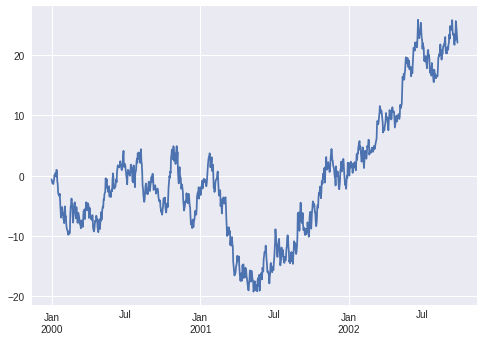

In [57]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

On a DataFrame, the [plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html#pandas.DataFrame.plot)() method is a convenience to plot all of the columns with labels:

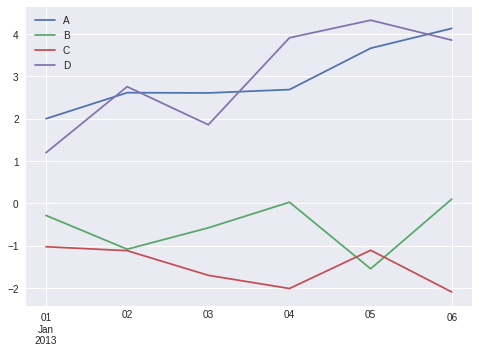

In [58]:
f = pd.DataFrame(np.random.randn(1000,4), 
                 index=ts.index,
                 columns=['A', 'B', 'C', 'D'])

df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

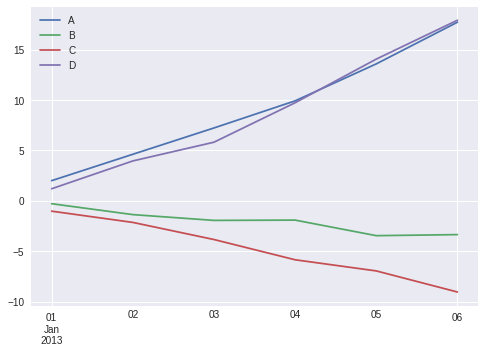

In [59]:
f = pd.DataFrame(np.random.randn(1000,4), 
                 index=pd.date_range('1/1/2000', periods=1000),
                 columns=['A', 'B', 'C', 'D'])

df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')